In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import array as arr

(<AxesSubplot:>,
 (-0.5, 511.5, 511.5, -0.5))

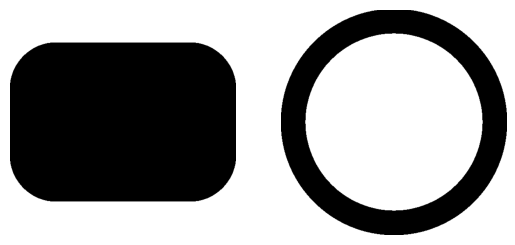

In [2]:
#read img
imgA = cv.imread('rectangle.png')
imgB = cv.imread('circle.png')

grayA = cv.cvtColor(imgA, cv.COLOR_RGB2GRAY)
grayB = cv.cvtColor(imgB, cv.COLOR_RGB2GRAY)

plt.subplot(1,2,1), plt.imshow(grayA, cmap='gray'), plt.axis('off')
plt.subplot(1,2,2), plt.imshow(grayB, cmap='gray'), plt.axis('off')

In [3]:
def conv(img, fil):
    new = img
    (a,b) = fil.shape
    (x,y) = img.shape
    scale = np.sum(abs(fil))
    padding = np.pad(img, [(1, 1),(1, 1)], mode='constant')
    for i in range(x):
        for j in range(y):
            sum = np.int8(0)
            img_cov = padding[i:i+a, j:j+b]
            mul = np.multiply(img_cov, fil)
            sum = np.sum(mul)
            new[i,j] = sum
    new = new/scale
    output = np.clip(new, a_min = 0, a_max = 255)
    return output

Prewitt operator

In [4]:
# filter mask
Hx1 = np.array([[-1, 0, 1],
               [-1, 0, 1],
               [-1, 0, 1]])
Hy1 = np.array([[-1, -1, -1],
               [ 0,  0,  0],
               [ 1,  1,  1]])

In [5]:
DxA = conv(grayA, Hx1)
grayA = cv.cvtColor(imgA, cv.COLOR_RGB2GRAY)
DyA = conv(grayA, Hy1)

DxB = Dx1 = conv(grayB, Hx1)
grayB = cv.cvtColor(imgB, cv.COLOR_RGB2GRAY)
DyB = conv(grayB, Hy1)


(<AxesSubplot:title={'center':'Prewitt'}>,
 (-0.5, 511.5, 511.5, -0.5),
 Text(0.5, 1.0, 'Prewitt'))

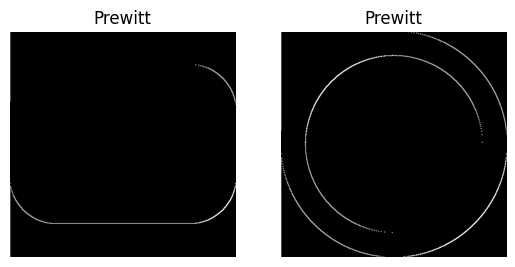

In [6]:
# Calculate 
EA = (DxA**2 + DyA**2)**(1/2)
EB = (DxB**2 + DyB**2)**(1/2)
plt.subplot(1,2,1), plt.imshow(EA, cmap='gray'), plt.axis('off'), plt.title('Prewitt')
plt.subplot(1,2,2), plt.imshow(EB, cmap='gray'), plt.axis('off'), plt.title('Prewitt')

Sobel Operator

In [7]:
# filter mask
Hx2= np.array([[-1, 0, 1],
               [-2, 0, 2],
               [-1, 0, 1]])
Hy2 = np.array([[-1, -2, -1],
               [ 0,  0,  0],
               [ 1,  2,  1]])

In [8]:
grayA = cv.cvtColor(imgA, cv.COLOR_RGB2GRAY)
DxA2 = conv(grayA, Hx2)
grayA = cv.cvtColor(imgA, cv.COLOR_RGB2GRAY)
DyA2 = conv(grayA, Hy2)

grayB = cv.cvtColor(imgB, cv.COLOR_RGB2GRAY)
DxB2 = conv(grayB, Hx2)
grayB = cv.cvtColor(imgB, cv.COLOR_RGB2GRAY)
DyB2 = conv(grayB, Hy2)

(<AxesSubplot:title={'center':'Sobel'}>,
 (-0.5, 511.5, 511.5, -0.5),
 Text(0.5, 1.0, 'Sobel'))

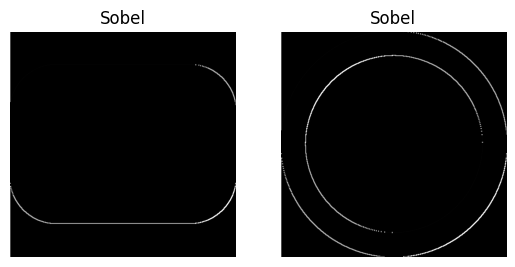

In [9]:
EA2 = (DxA2**2 + DyA2**2)**(1/2)
EB2 = (DxB2**2 + DyB2**2)**(1/2)
plt.subplot(1,2,1), plt.imshow(EA2, cmap='gray'), plt.axis('off'), plt.title('Sobel')
plt.subplot(1,2,2), plt.imshow(EB2, cmap='gray'), plt.axis('off'), plt.title('Sobel')

Robert Operator

In [10]:
# Filter mask
Hr1 = np.array([[0, 1],
                [-1, 0]])
Hr2 = np.array([[-1, 0],
                [0, 1]])

In [11]:
grayA = cv.cvtColor(imgA, cv.COLOR_RGB2GRAY)
Dr1A = conv(grayA, Hr1)
grayA = cv.cvtColor(imgA, cv.COLOR_RGB2GRAY)
Dr2A = conv(grayA, Hr2)

grayB = cv.cvtColor(imgB, cv.COLOR_RGB2GRAY)
Dr1B = conv(grayB, Hr1)
grayB = cv.cvtColor(imgB, cv.COLOR_RGB2GRAY)
Dr2B = conv(grayB, Hr2)


(<AxesSubplot:title={'center':'Robert'}>,
 (-0.5, 511.5, 511.5, -0.5),
 Text(0.5, 1.0, 'Robert'))

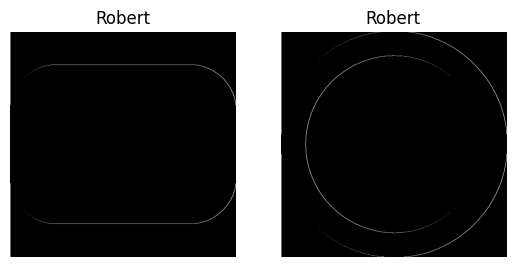

In [12]:
# Calculate
ErA = (Dr1A**2 + Dr2A**2)**(1/2)
ErB = (Dr1B**2 + Dr2B**2)**(1/2)
plt.subplot(1,2,1), plt.imshow(ErA, cmap='gray'), plt.axis('off'), plt.title('Robert')
plt.subplot(1,2,2), plt.imshow(ErB, cmap='gray'), plt.axis('off'), plt.title('Robert')